### Important to always check the imports for changes

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import os
import sys

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
#Make sure to add the csv files in a data folder locally, since these can't be stored on github
#any changes in the data folder will be ignored by github, since it is added to the .gitignore
training_data = 'data/train_V2.csv'
testing_data = 'data/test_V2.csv'

# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                # if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                # el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        # else:
        # df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

train_set = pd.read_csv(training_data)
train_set = reduce_mem_usage(train_set)
test_set = pd.read_csv(testing_data)
test_set = reduce_mem_usage(test_set)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)
Memory usage of dataframe is 413.18 MB --> 140.19 MB (Decreased by 66.1%)


In [3]:
train_set.head(10)
#leftover code van Nathan
#killplace = train_set.sort_values('killPlace')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [4]:
train_set.tail(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,...,1,0.0,0,0.000,0,0,363.70,2,0,0.4583
4446958,837349af7e8a35,58bc4104935623,2001300d4f5787,0,0,0.00,0,0,0,92,...,0,0.0,0,0.000,0,0,0.00,0,0,0.0000
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.68,0,0,0,89,...,0,0.0,0,0.000,0,0,40.25,1,0,0.0842
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.00,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.00,5,0,0.5464


We would like to select all matches that are played by solo players. Excluding matches from duo, squad or custom gamemodes. 
This should simplify the feature selection process, and help us draw a conclusion over a more homogeneous data source.

In [7]:
solo_train_set = train_set[train_set['matchType'].isin(['solo','solo-fpp'])]
print('there are {} data rows for solo games'.format(len(solo_train_set)))
print('distributed over {} unique games'.format(solo_train_set['matchId'].nunique()))

there are 718705 data rows for solo games
distributed over 7976 unique games


Given the large size of our partitioned training set, taking a random sample will prove helpful when exploring different ML approaches.

In [8]:
#sampled_solo_train_set = solo_train_set.sample(frac=0.1)
#This would be an easy solution to the problem, however the rows would be from different games
matchlist = solo_train_set['matchId'].unique()
print("checking if the lengths are equal:\nlen(matchlist) = {}\nsolo_train_set['matchId'].nunique() = {}".format(len(matchlist), solo_train_set['matchId'].nunique()))

amount_of_games = 1000
sampled_matchlist = random.sample(set(matchlist), amount_of_games)

sampled_solo_train_set = solo_train_set[solo_train_set['matchId'].isin(sampled_matchlist)]
print('\nthere are {} sampled data rows'.format(len(sampled_solo_train_set)))
print('distributed over {} unique games'.format(sampled_solo_train_set['matchId'].nunique()))

checking if the lengths are equal:
len(matchlist) = 7976
solo_train_set['matchId'].nunique() = 7976

there are 89510 sampled data rows
distributed over 1000 unique games


With this obtained sample we are able to quickly do some basic Data Analytics and ML.

In [9]:
sampled_solo_train_set.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,89510.000000,89510.000000,89510.000000,89510.0,89510.000000,89510.00000,89510.000000,89510.000000,89510.000000,89510.000000,...,89510.0,89510.00000,89510.000000,89510.000000,89510.000000,89510.000000,89510.000000,89510.000000,89510.000000,89510.000000
mean,0.057156,1.051648,117.309898,0.0,0.244889,0.99018,47.512669,465.622076,0.919383,0.472439,...,0.0,450.17749,0.005161,5.095042,0.011194,0.004078,942.587952,3.536130,580.695397,0.486747
std,0.244196,1.795517,158.152634,0.0,0.635420,2.34388,27.733367,599.433066,1.495312,0.558497,...,0.0,1345.21814,0.083736,34.227413,0.105210,0.066305,1059.879761,2.376556,734.706339,0.298723
min,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,23.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,98.107498,2.000000,0.000000,0.227300
50%,0.000000,0.000000,73.870003,0.0,0.000000,0.00000,47.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,489.500000,3.000000,0.000000,0.483900
75%,0.000000,2.000000,169.100006,0.0,0.000000,1.00000,71.000000,1103.000000,1.000000,1.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1565.000000,5.000000,1494.000000,0.747300
max,4.000000,21.000000,2267.000000,0.0,15.000000,48.00000,100.000000,1940.000000,23.000000,13.000000,...,0.0,33970.00000,8.000000,1243.000000,1.000000,3.000000,10750.000000,42.000000,1918.000000,1.000000


Hunting for missing data: **none**

In [15]:
sampled_solo_train_set.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

Checking data type info: only matchtype is of type **object**

In [16]:
sampled_solo_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89510 entries, 63 to 4446959
Data columns (total 29 columns):
Id                 89510 non-null object
groupId            89510 non-null object
matchId            89510 non-null object
assists            89510 non-null int8
boosts             89510 non-null int8
damageDealt        89510 non-null float32
DBNOs              89510 non-null int8
headshotKills      89510 non-null int8
heals              89510 non-null int8
killPlace          89510 non-null int8
killPoints         89510 non-null int16
kills              89510 non-null int8
killStreaks        89510 non-null int8
longestKill        89510 non-null float32
matchDuration      89510 non-null int16
matchType          89510 non-null object
maxPlace           89510 non-null int8
numGroups          89510 non-null int8
rankPoints         89510 non-null int16
revives            89510 non-null int8
rideDistance       89510 non-null float32
roadKills          89510 non-null int8
swimDistan

### Creating a heatmap of correlations between features

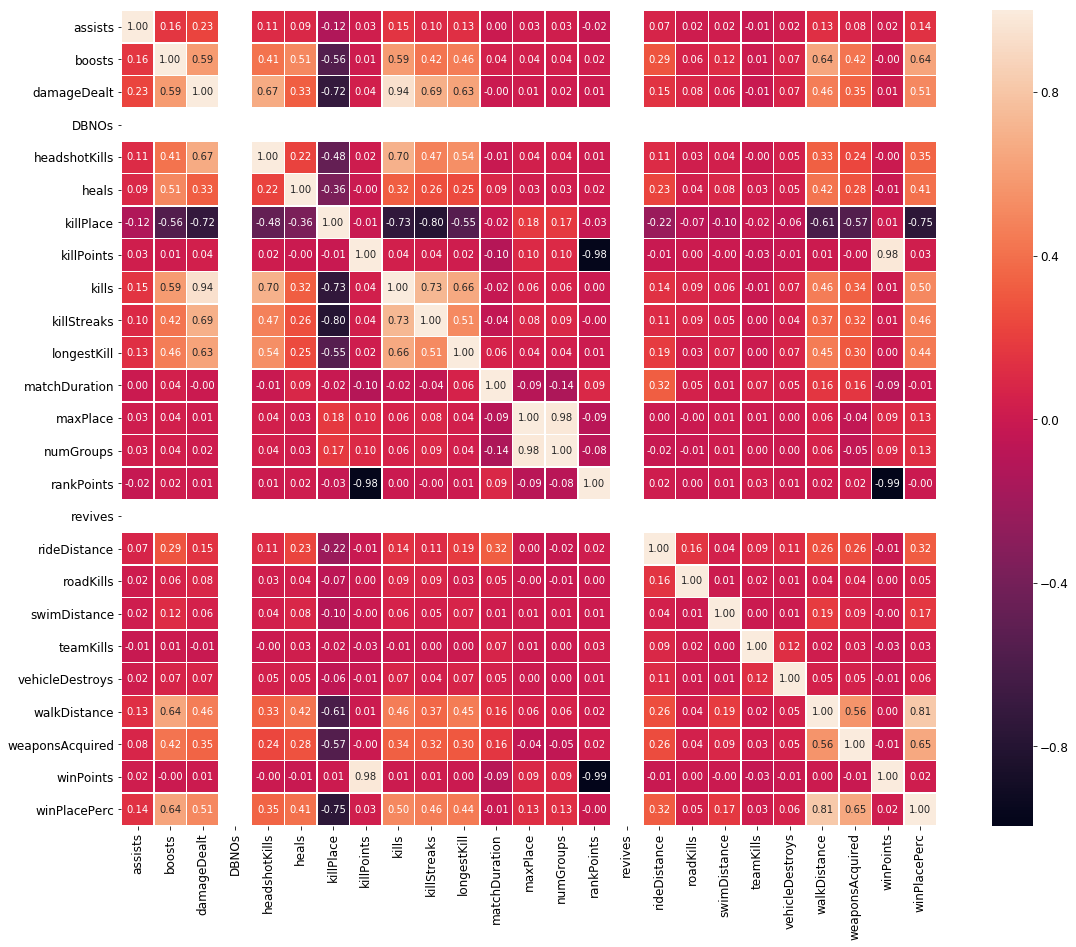

In [33]:
#Check seaborn docs for parameters of heatmap, note: I might be missing some things
plt.figure(figsize=(20,15))
sns.heatmap(sampled_solo_train_set.corr(), annot=True, fmt=".2f", linewidths=.5, square=True)
plt.show()